In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [5]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
cols = df.columns
for col in cols:
    print(col,': ', df[col].isna().sum())


Hours Studied :  0
Previous Scores :  0
Extracurricular Activities :  0
Sleep Hours :  0
Sample Question Papers Practiced :  0
Performance Index :  0


In [11]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace(['Yes', 'No'], [1, 0])
df.head()

/tmp/ipykernel_21104/3121636980.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Extracurricular Activities'] = df['Extracurricular Activities'].replace(['Yes', 'No'], [1, 0])


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


As till here, we have exported the data, checked for null values, replaced the categorical column data with 0 for 'No' and 1 for 'Yes'.

So, data cleaning has done, now lets split the dataset and train the model.

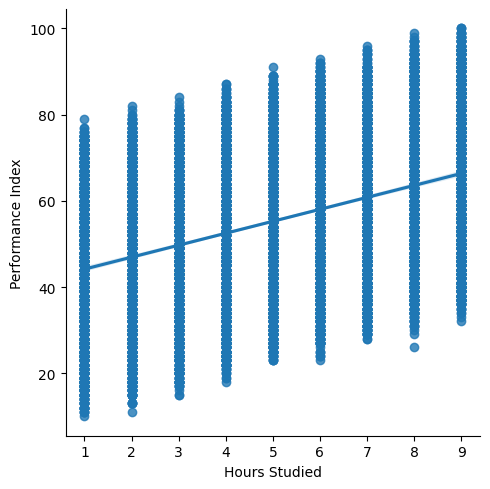

In [16]:
#Let's just predict the actual values.
sbn.lmplot(df, x='Hours Studied', y='Performance Index')

In [ ]:
x = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [22]:
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
y_pred = reg_model.predict(x_test)

In [25]:
reg_model.coef_

array([2.85062888, 1.01782319, 0.59703413, 0.47427101, 0.19023783])

In [26]:
reg_model.intercept_

np.float64(-33.9521874376495)

In [31]:
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)

4.096440469458504
0.9892386793406651


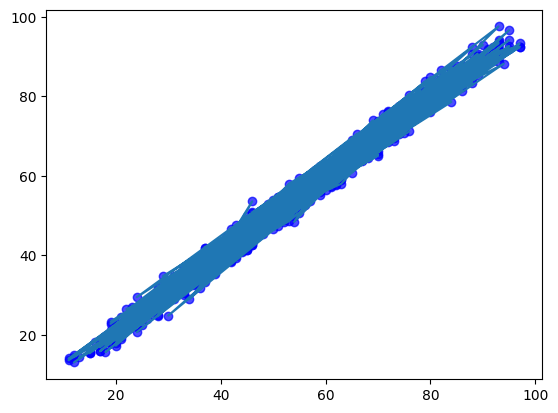

In [33]:
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot(y_test, y_pred)